In [ ]:
# Apple width = 8
# Apple length = 8
# banana width = 4
# banana length = 12

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
N = 1000
std = 1
banana_width = np.random.normal(4,std,N)
banana_length = np.random.normal(12,std,N)

apple_width = np.random.normal(8,std,N)
apple_length = np.random.normal(8,std,N)
width = np.concatenate((banana_width,apple_width))
length = np.concatenate((banana_length,apple_length))

In [3]:
x = np.array([width,length]).T
label_banana = np.zeros(N,np.int8)
label_apple = np.ones(N,np.int8)
y = np.concatenate((label_banana,label_apple))

Text(0.5, 1.0, 'The Scatter Chart Data distribution map')

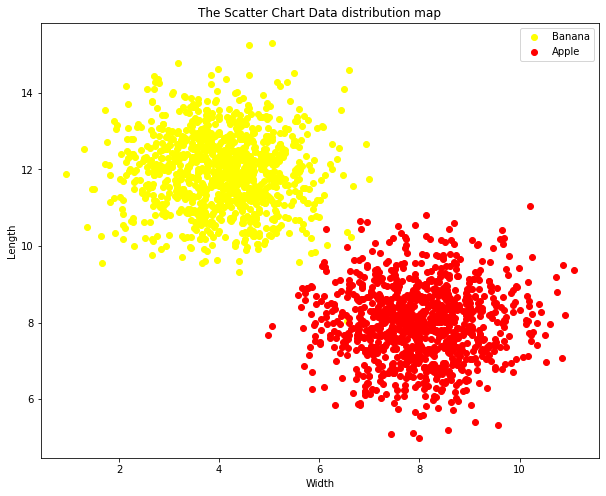

In [4]:
## Matplotlib Scatter

plt.figure(figsize=(10,8))
plt.scatter(x[:N,0],x[:N,1],c= "yellow",label="Banana")
plt.scatter(x[N:,0],x[N:,1],c="red",label="Apple")
plt.legend()
plt.xlabel("Width")
plt.ylabel("Length")
plt.title("The Scatter Chart Data distribution map")

c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


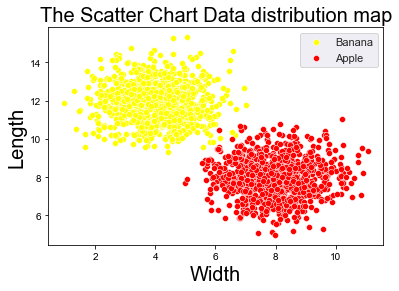

In [5]:
## Seaborn Scatter

sns.scatterplot(x[:N,0],x[:N,1],color="yellow")
sns.scatterplot(x[N:,0],x[N:,1],color="red")
sns.set(rc={'figure.figsize':(10,8)})
p = sns.lineplot()
p.set_xlabel("Width", fontsize = 20)
p.set_ylabel("Length", fontsize = 20)
p.set_title("The Scatter Chart Data distribution map",fontsize = 20)
p.legend(labels = ["Banana","Apple"])

In [6]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.20)

In [16]:
start = time.time()
knn = KNeighborsClassifier(5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_pred_true = (y_pred ==y_test)
evaluate = np.bincount(y_pred_true)[1]/len(y_pred_true)
print(evaluate)
print(time.time()-start)

0.9975
0.019956350326538086


In [14]:
start = time.time()
knn = KNeighborsClassifier(5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
evaluate = knn.score(x_test,y_test)
evaluate
print(evaluate)
print(time.time()-start)

0.9975
0.031951189041137695


In [17]:
class KNN:
    def __init__(self,k):
        self.k = k
    ## Train
    def fit(self,x_train,y_train):
        self.x_train = x_train
        self.y_train = y_train
        self.number_class = len(np.unique(y))
    
    def nearneighbors(self,x_test):
        dist = np.sqrt(np.sum((x_test-self.x_train)**2,axis=1))
        nearest = np.argsort(dist)[:self.k]
        return nearest
    
    ## Test
    def predict(self,x_test):
        nearest = self.nearneighbors(x_test)
        y = np.argmax(np.bincount(self.y_train[nearest]))
        return y
    
    def evaluate(self,x_test,y_test):
        y_pred = []
        for i in x_test:
            y_pred.append(self.predict(i))
        y_pred_true = (y_pred==y_test)
        evaluate = np.bincount(y_pred_true)[1]/len(y_pred)
        return evaluate
        

In [18]:
start_time = time.time()
knn = KNN(5)
knn.fit(x_train,y_train)
evaluate = knn.evaluate(x_test,y_test)
evaluate
end = time.time()
print(end-start_time)
print(e

0.058878183364868164
